<a href="https://colab.research.google.com/github/SarankanT/MSCI-433-FinalProject/blob/main/Titanic_proposal_Baseline%26Improvements_MSCI546.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages & Data Preparation


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
train_data = pd.read_csv("/content/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_data[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


## Baseline Model - Decision Tree Classifier

In [ ]:
#importing necessary libraries for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

a = DecisionTreeClassifier(min_samples_split=100)

features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(train_data[features])

X_train, X_test, y_train, y_test = train_test_split(X, # X - features
                                                    train_data.Survived, # y - target
                                                    test_size=0.2,
                                                    random_state = 42)

a.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=100)

In [ ]:
y_pred = a.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy  = accuracy_score(y_test,y_pred)
print("Accuracy using Decision Tree: ", accuracy*100 )

Accuracy using Decision Tree:  79.3296089385475


In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8245614035087719
Recall: 0.6351351351351351


## Establish Training data splits

For training data, all of the training data will be used as opposed to the 80/20 split of the train data as previously done.



In [ ]:

#X_train, X_test, y_train, y_test

#X_train = pd.get_dummies(train_data[features])
#y_train = train_data["Survived"]

## Establishing evaluation datasets:
- X_Testing uses all feature varaibles from provided test set
- y_Testing - uses target column from sample submission of compettion to provide comparison to our developed model

In [ ]:
X_Testing = X_test
y_testing = y_test


#X_Testing = pd.get_dummies(test_data[features])

#y_testing = pd.read_csv('/content/gender_submission.csv', usecols=['Survived'])

len(y_testing)


179

## Improvement Model 1 - Boosted Decision Tree

- Baseline model of decision tree is prone to factors such as overfitting, barring it from generalizing well to new data (gets overfit to the data it was trained upon). Common practice in industry is to apply ensemble learning methods, such as boosting. Boosting applies many weak models that learn on the errors of the previous model, for a more holistic approach to prediction, with less bias on the fitting the paramters around training data.

Thus a boosted decision tree will be implemented below.

<ipython-input-24-4000cddbf5b7>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


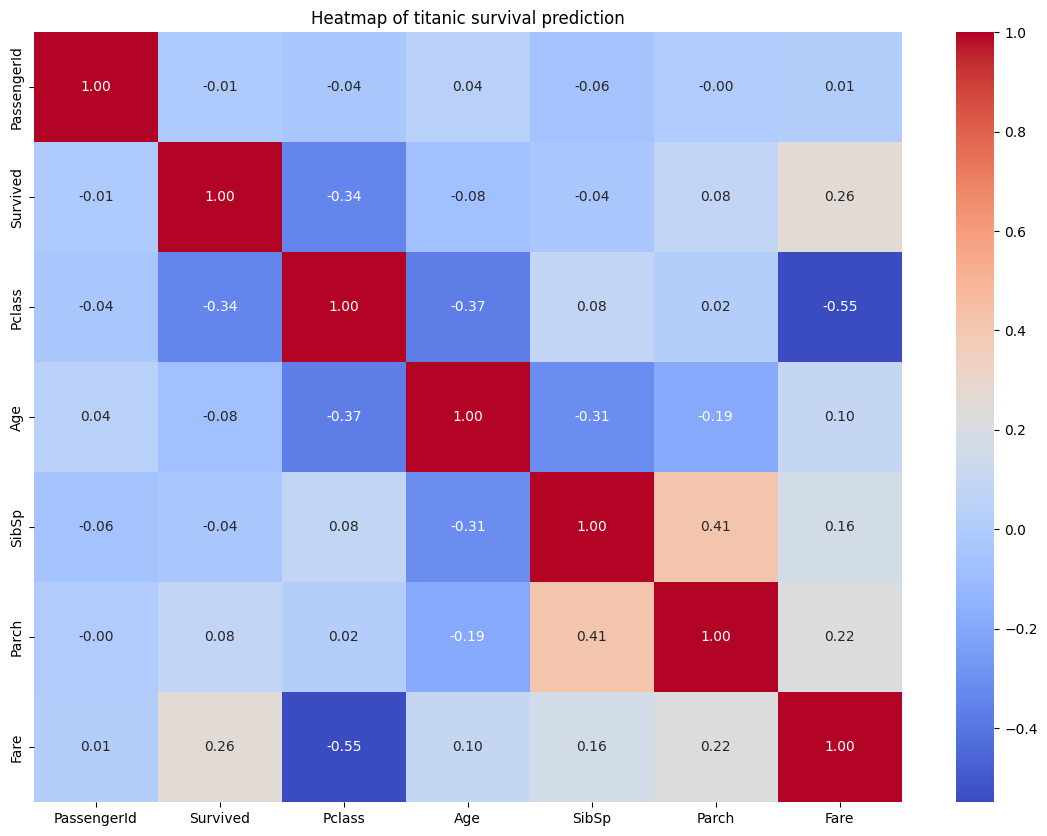

In [ ]:
# creating a heat map to understand correlations better

#evaluating if any other features stand out that may help with prediction

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of titanic survival prediction')
plt.show()

The fare stand out as a factor not considered in the baseline and has high correlation with our target, but can also be considered redundant as it would correlate with passenger class, which itself is a proxy for the fare.

In [ ]:
import xgboost as xgb
# import library for xgboost classifier

boost = xgb.XGBClassifier()

boost.fit(X_train, y_train) # fit model on training data

y_pred_boost = boost.predict(X_Testing)
# the same set of features will be used to predict our target of surv

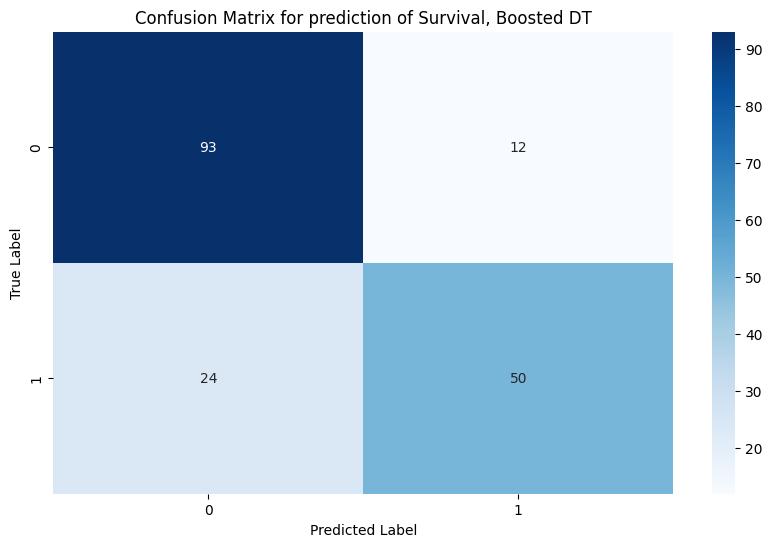

In [ ]:
#confusion matrix for boosted decision tree
from sklearn import metrics

cm_boost = metrics.confusion_matrix(y_testing, y_pred_boost)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for prediction of Survival, Boosted DT')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



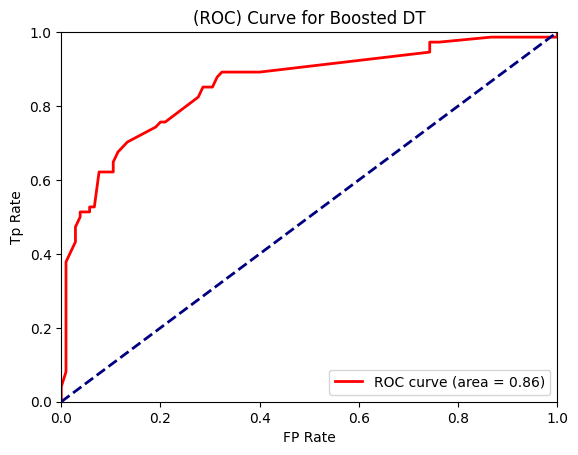

In [ ]:
from sklearn.metrics import roc_curve, auc, f1_score, precision_recall_curve
precision_score, recall_score

y_pred_prob_boost = boost.predict_proba(X_Testing)[:, 1]

fpr, tpr, _ = roc_curve(y_testing, y_pred_prob_boost)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP Rate')
plt.ylabel('Tp Rate')
plt.title('(ROC) Curve for Boosted DT')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#F1, Precision and Recall

F1 = f1_score(y_testing,y_pred_boost)
print("F1 Score:", F1)

precision = precision_score(y_testing,y_pred_boost)
recall = recall_score(y_testing,y_pred_boost)

print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.7352941176470588
Precision: 0.8064516129032258
Recall: 0.6756756756756757


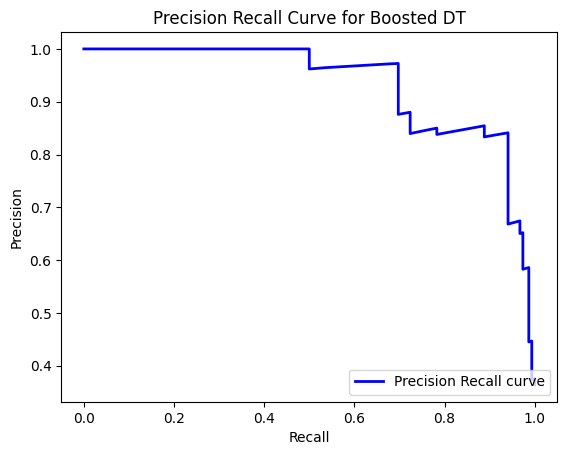

In [ ]:
#p/r curve

# Calculating precision-recall curve
precision, recall, _ = precision_recall_curve(y_testing, y_pred_prob_boost)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Boosted DT')
plt.legend(loc="lower right")
plt.show()


## Improvement Model 2 - Random Forest Classifier
- write something here


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_Testing)

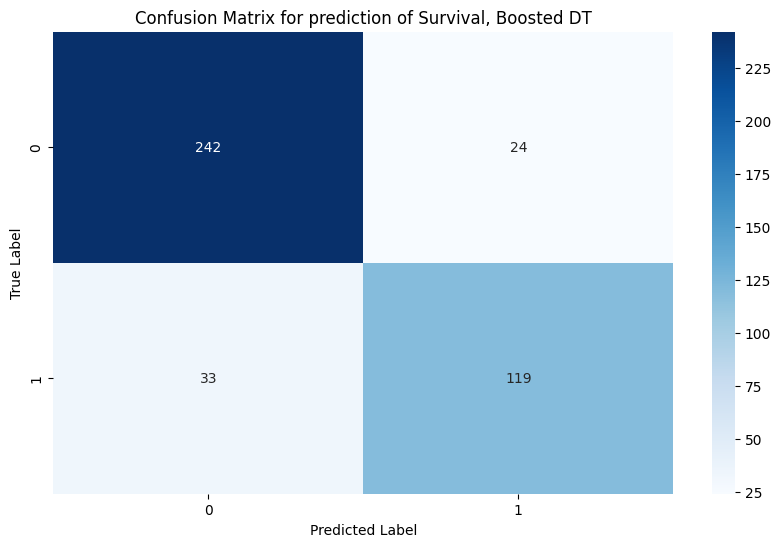

In [ ]:
#confusion matrix for boosted decision tree
from sklearn import metrics

cm_boost = metrics.confusion_matrix(y_testing, y_pred_rf)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for prediction of Survival, Boosted DT')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

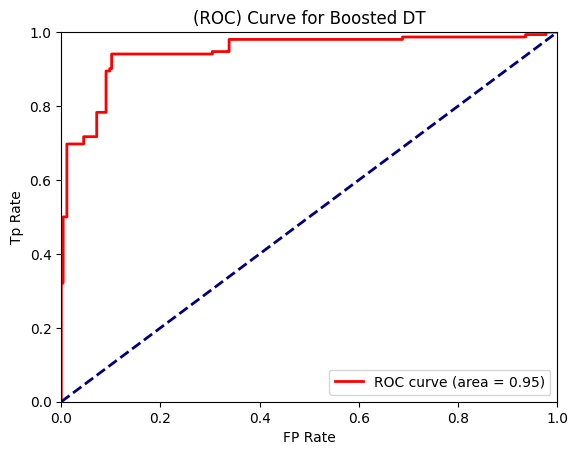

In [ ]:
from sklearn.metrics import roc_curve, auc, f1_score, precision_recall_curve
precision_score, recall_score

y_pred_prob_rf = rf.predict_proba(X_Testing)[:, 1]

fpr, tpr, _ = roc_curve(y_testing, y_pred_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP Rate')
plt.ylabel('Tp Rate')
plt.title('(ROC) Curve for Boosted DT')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_recall_curve
# accuracy
accuracy  = accuracy_score(y_testing, y_pred_rf)
print("Accuracy using Decision Tree: ", accuracy*100)

#F1, Precision and Recall

F1 = f1_score(y_testing,y_pred_rf)
print("F1 Score:", F1)

precision = precision_score(y_testing,y_pred_rf)
recall = recall_score(y_testing,y_pred_rf)

print("Precision:", precision)
print("Recall:", recall)

Accuracy using Decision Tree:  86.36363636363636
F1 Score: 0.8067796610169493
Precision: 0.8321678321678322
Recall: 0.7828947368421053


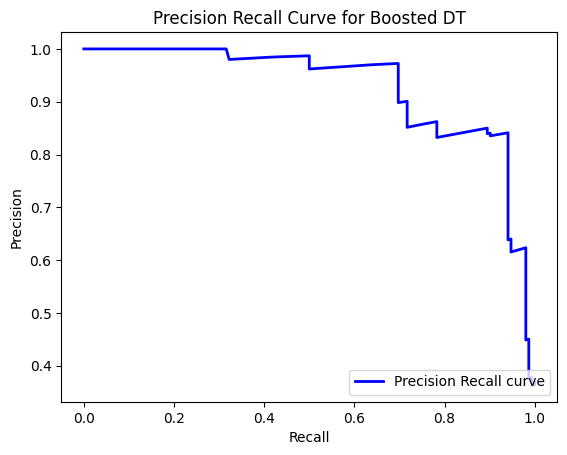

In [ ]:
#p/r curve

# Calculating precision-recall curve
precision, recall, _ = precision_recall_curve(y_testing, y_pred_prob_rf)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Boosted DT')
plt.legend(loc="lower right")
plt.show()

# Improvement Model 3 - k-Nearest Neighbour Classifier

Intuitively, you would think that passengers with similar characteristics would have similar survival outcomes. The k-Nearest Neighbour classifier follows this intuition and makes predictions based on the majority class of nearby data points (i.e passengers).

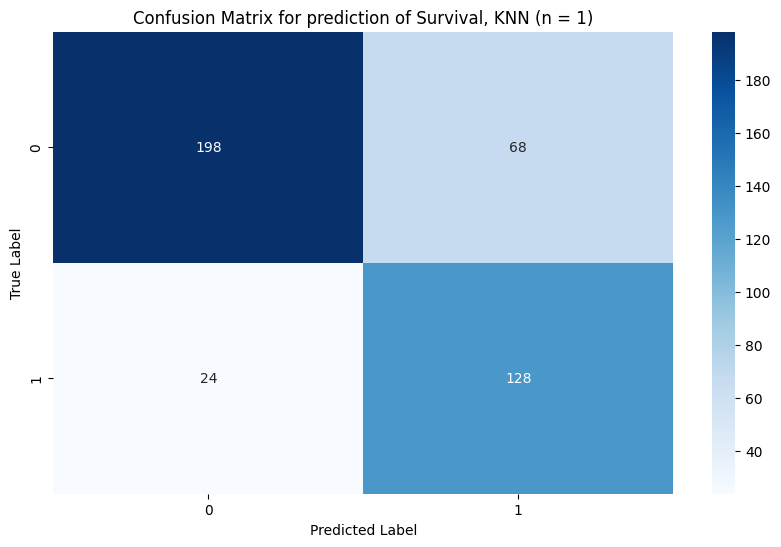

Accuracy: 0.7799043062200957
F1 Score: 0.735632183908046
Precision: 0.6530612244897959
Recall: 0.8421052631578947


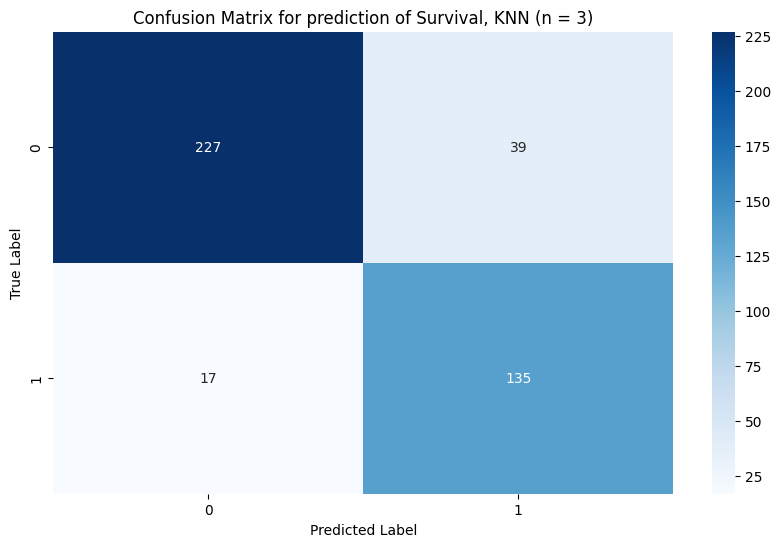

Accuracy: 0.8660287081339713
F1 Score: 0.8282208588957055
Precision: 0.7758620689655172
Recall: 0.8881578947368421


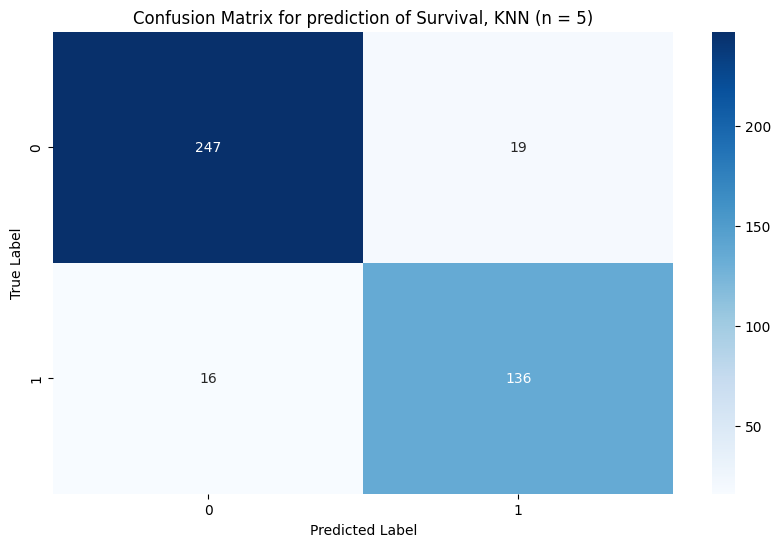

Accuracy: 0.916267942583732
F1 Score: 0.8859934853420195
Precision: 0.8774193548387097
Recall: 0.8947368421052632


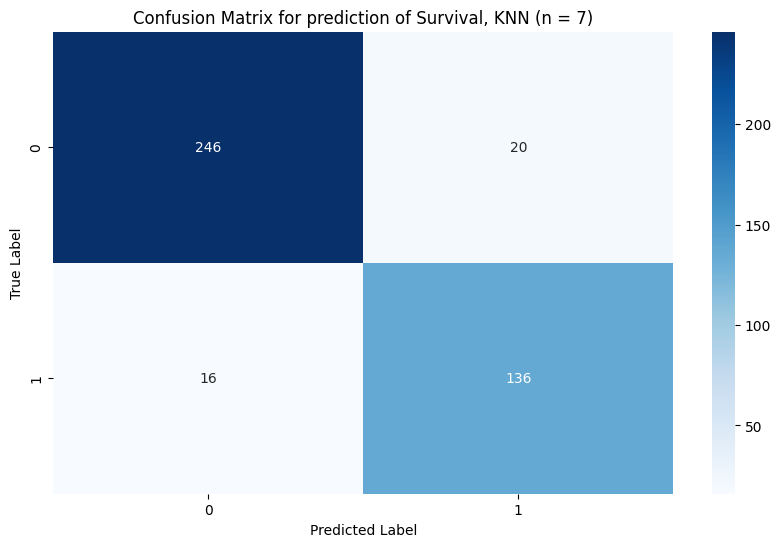

Accuracy: 0.9138755980861244
F1 Score: 0.8831168831168831
Precision: 0.8717948717948718
Recall: 0.8947368421052632


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# start by preprocessing the data so values are more "normalized"
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_Testing)

k_experiments = [1, 3, 5, 7]
for k in k_experiments:
  # train KNN model
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)

  # make predictions
  y_pred_knn = knn.predict(X_test_scaled)

  # evaluate model
  knn_cm = metrics.confusion_matrix(y_testing, y_pred_knn)

  # plot confusion matrix
  plt.figure(figsize=(10, 6))
  sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix for prediction of Survival, KNN (n = {k})')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

  # compute metrics
  accuracy = accuracy_score(y_testing, y_pred_knn)
  print("Accuracy:", accuracy)
  F1 = f1_score(y_testing,y_pred_knn)
  print("F1 Score:", F1)
  precision = precision_score(y_testing,y_pred_knn)
  recall = recall_score(y_testing,y_pred_knn)
  print("Precision:", precision)
  print("Recall:", recall)

The metrics are nearly equal for k = 5 and k = 7, so 5 can be taken as a good number of nearest neighbours.

We can try another variation of the KNN model by training the model without normalizing the data. In theory, the normalization should have improved performance as it factors in differences in units between features.

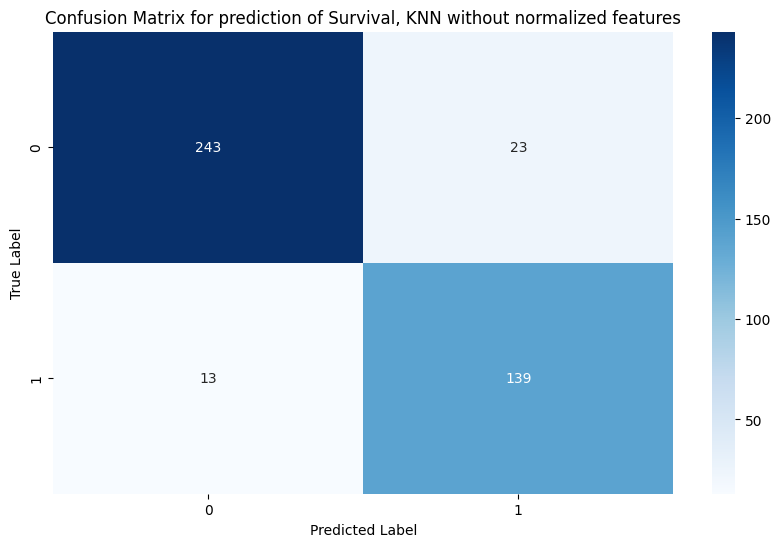

Accuracy: 0.9138755980861244
F1 Score: 0.8853503184713376
Precision: 0.8580246913580247
Recall: 0.9144736842105263


In [ ]:
# train KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# make predictions
y_pred_knn = knn.predict(X_Testing)

# evaluate model
knn_cm = metrics.confusion_matrix(y_testing, y_pred_knn)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for prediction of Survival, KNN without normalized features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# compute metrics
accuracy = accuracy_score(y_testing, y_pred_knn)
print("Accuracy:", accuracy)

F1 = f1_score(y_testing,y_pred_knn)
print("F1 Score:", F1)

precision = precision_score(y_testing,y_pred_knn)
recall = recall_score(y_testing,y_pred_knn)
print("Precision:", precision)
print("Recall:", recall)

The accuracy and F1 score are the same for this KNN model without normalization. Precision decreased by 2%, but this is balanced out by a 2% increase in recall. Overall, it seems that normalizing the features has a negligible effect on model performance for this dataset.

 Below is the ROC Curve and Precision-Recall Curve for the KNN model with k = 5.

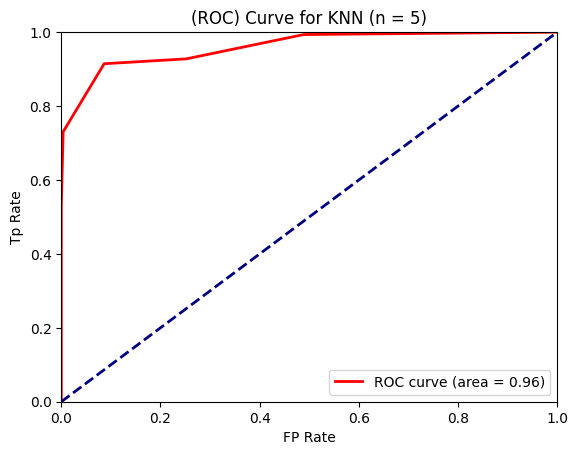

In [ ]:
y_pred_prob_knn = knn.predict_proba(X_Testing)[:, 1]

fpr, tpr, _ = roc_curve(y_testing, y_pred_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP Rate')
plt.ylabel('Tp Rate')
plt.title('(ROC) Curve for KNN (n = 5)')
plt.legend(loc="lower right")
plt.show()

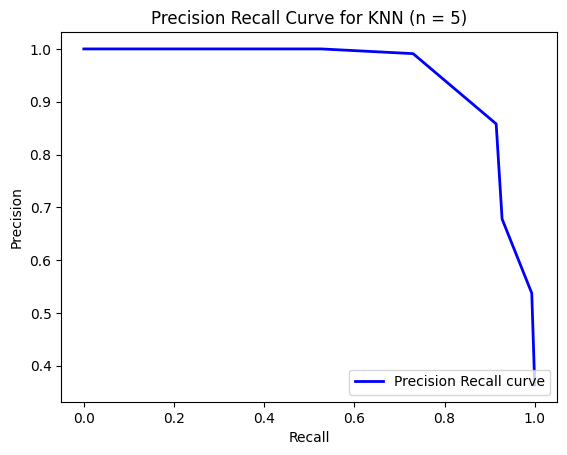

In [ ]:
# Calculating precision-recall curve
precision, recall, _ = precision_recall_curve(y_testing, y_pred_prob_knn)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for KNN (n = 5)')
plt.legend(loc="lower right")
plt.show()

# Improvement Model 4 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# predictions
y_pred_log_reg = log_reg.predict(X_Testing)

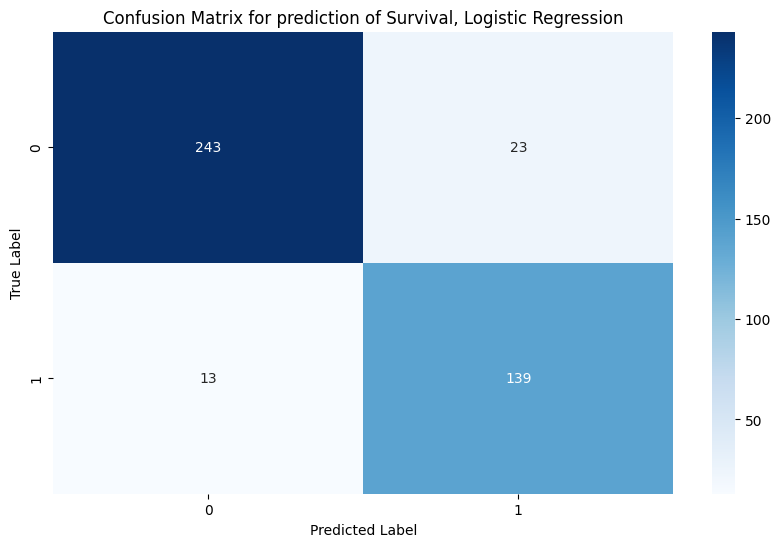

In [ ]:
# evaluate model
log_reg_cm = metrics.confusion_matrix(y_testing, y_pred_knn)

# plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for prediction of Survival, Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# compute metrics
F1 = f1_score(y_testing,y_pred_knn)
print("F1 Score:", F1)

precision = precision_score(y_testing,y_pred_knn)
recall = recall_score(y_testing,y_pred_knn)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.8853503184713376
Precision: 0.8580246913580247
Recall: 0.9144736842105263


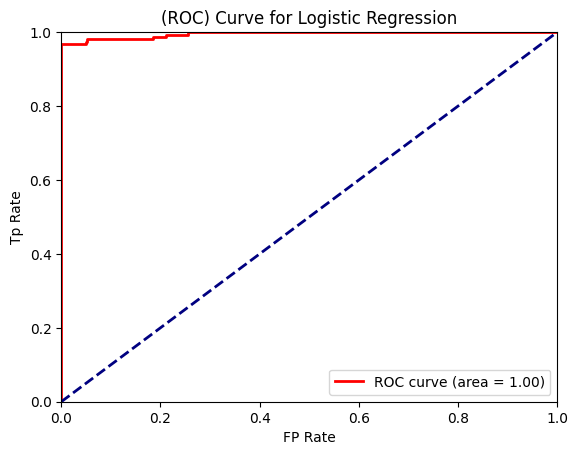

In [ ]:
y_pred_prob_log_reg = log_reg.predict_proba(X_Testing)[:, 1]

fpr, tpr, _ = roc_curve(y_testing, y_pred_prob_log_reg)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('FP Rate')
plt.ylabel('Tp Rate')
plt.title('(ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

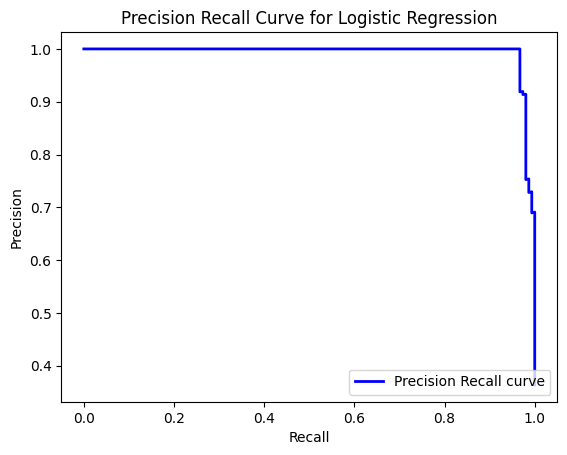

In [ ]:
# Calculating precision-recall curve
precision, recall, _ = precision_recall_curve(y_testing, y_pred_prob_log_reg)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## Neural Network Implementation

Next section will implement a neural network with Pytorch libararies

In [ ]:
# libraries needed
import torch
import torch.nn as nn
import torch.optim as optim

features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]

x_nn = pd.get_dummies(train_data[features])
y_nn = train_data.Survived

x_nn.head()
print(type(x_nn))
print(type(y_nn))

#convert to pytorch dtypes
x_nn = torch.tensor(x_nn.to_numpy(), dtype=torch.float32)
y_nn = torch.tensor(y_nn.to_numpy(), dtype=torch.float32).reshape(-1, 1)

#check if converted
print(type(x_nn))
print(type(y_nn))



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
#converting testting splits to pytorch type



#convert to pytorch dtypes
x_nn_test = torch.tensor(X_Testing.to_numpy(), dtype=torch.float32)
y_nn_test = torch.tensor(y_testing.to_numpy(), dtype=torch.float32).reshape(-1, 1)

#check if converted
print(type(x_nn_test))
print(type(y_nn_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
NeurN = nn.Sequential(
    nn.Linear(8, 12), # 5 input nodes to 10 nodes in the first hidden layer
    nn.ReLU(),        # ReLU activation for first hidden layer
    nn.Linear(12, 12), # 10 nodes from first hidden layer to 8 in the second
    nn.ReLU(),        # ReLU activation for second hidden layer
    nn.Linear(12, 1),  # 8 nodes from second hidden layer to 1 output node
    nn.Sigmoid()      # Sigmoid activation for output layer
)

print(NeurN) # Check the model

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=12, bias=True)
  (3): ReLU()
  (4): Linear(in_features=12, out_features=1, bias=True)
  (5): Sigmoid()
)


In [ ]:
lossFn = nn.BCELoss()
optimizer = optim.Adam(NeurN.parameters(), lr = 0.001)


n_epochs = 100
batch_size = 13

for epoch in range(n_epochs):
    for i in range(0, len(x_nn), batch_size):
        Xbatch = x_nn[i:i+batch_size]
        y_pred = NeurN(Xbatch)
        ybatch = y_nn[i:i+batch_size]
        loss = lossFn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.5855734944343567
Finished epoch 1, latest loss 0.49854016304016113
Finished epoch 2, latest loss 0.47766658663749695
Finished epoch 3, latest loss 0.48489728569984436
Finished epoch 4, latest loss 0.48348310589790344
Finished epoch 5, latest loss 0.46159783005714417
Finished epoch 6, latest loss 0.43842342495918274
Finished epoch 7, latest loss 0.4154292047023773
Finished epoch 8, latest loss 0.39701470732688904
Finished epoch 9, latest loss 0.3820054233074188
Finished epoch 10, latest loss 0.3697827160358429
Finished epoch 11, latest loss 0.3608589768409729
Finished epoch 12, latest loss 0.3536272644996643
Finished epoch 13, latest loss 0.34792202711105347
Finished epoch 14, latest loss 0.3421385586261749
Finished epoch 15, latest loss 0.33915430307388306
Finished epoch 16, latest loss 0.33505406975746155
Finished epoch 17, latest loss 0.33161625266075134
Finished epoch 18, latest loss 0.3289214074611664
Finished epoch 19, latest loss 0.3267474174499511

In [ ]:
print(f'Shape of Xbatch: {Xbatch.shape}')
print(f'Shape of y_pred: {y_pred.shape}')

Shape of Xbatch: torch.Size([7, 8])
Shape of y_pred: torch.Size([7, 1])


In [ ]:
print(f'Number of input features: {NeurN[0].in_features}')
print(f'Number of output features: {NeurN[0].out_features}')

Number of input features: 8
Number of output features: 12


In [ ]:
with torch.no_grad(): # This prevents the model from calculating gradients when we don't need it to (optional)
  y_pred = NeurN(x_nn_test)

print(y_pred)

tensor([[0.3599],
        [0.1627],
        [0.1137],
        [0.9299],
        [0.6539],
        [0.9778],
        [0.7575],
        [0.1305],
        [0.7575],
        [0.9842],
        [0.3525],
        [0.1137],
        [0.2023],
        [0.1632],
        [0.1627],
        [0.9853],
        [0.3525],
        [0.7575],
        [0.1627],
        [0.2990],
        [0.1137],
        [0.2990],
        [0.4749],
        [0.1137],
        [0.1137],
        [0.1308],
        [0.3978],
        [0.1627],
        [0.1308],
        [0.4929],
        [0.1137],
        [0.4929],
        [0.3978],
        [0.4929],
        [0.1137],
        [0.2544],
        [0.2990],
        [0.7575],
        [0.9828],
        [0.1137],
        [0.2377],
        [0.1260],
        [0.1137],
        [0.0651],
        [0.7470],
        [0.1843],
        [0.1137],
        [0.1137],
        [0.1137],
        [0.5215],
        [0.6536],
        [0.9802],
        [0.0989],
        [0.6287],
        [0.0651],
        [0

In [ ]:
y_pred = y_pred.round()

Text(0.5, 427.9555555555555, 'Predicted label')

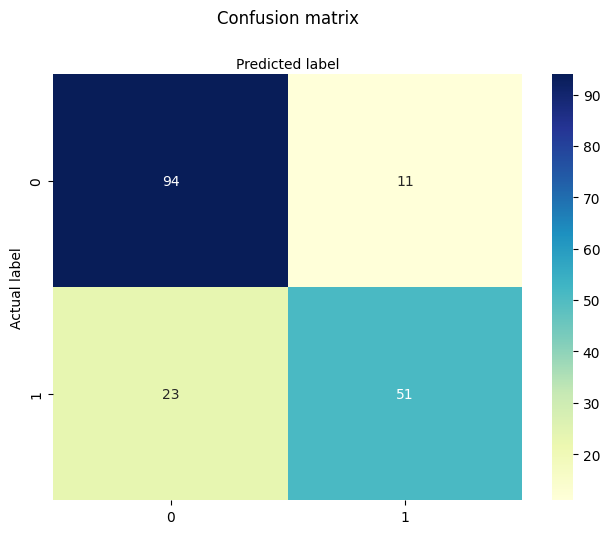

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cnf_matrix = metrics.confusion_matrix(y_nn_test, y_pred)

class_names=[0,1] # Names of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')